## **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

## **Create Data**

In [2]:
X, y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, random_state = 42)

In [3]:
X.shape

(1000, 2)

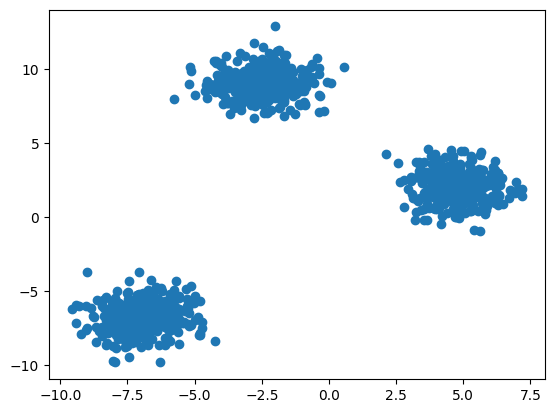

In [6]:
plt.scatter(X[:, 0], X[:, 1])

## **Train Test Split**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

##**KMeans**

In [9]:
from sklearn.cluster import KMeans

## **Manual Process**
## **Elbow method to select the K value**

In [13]:
wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [14]:
wcss

[44450.723875420386,
 12741.823357662124,
 1329.7219815435355,
 1161.3578990808314,
 1005.8929298169119,
 852.7959585881481,
 753.3173847079706,
 674.3123638460393,
 592.7859451500346,
 545.4828476941848]

## **Plot the elbow curve**

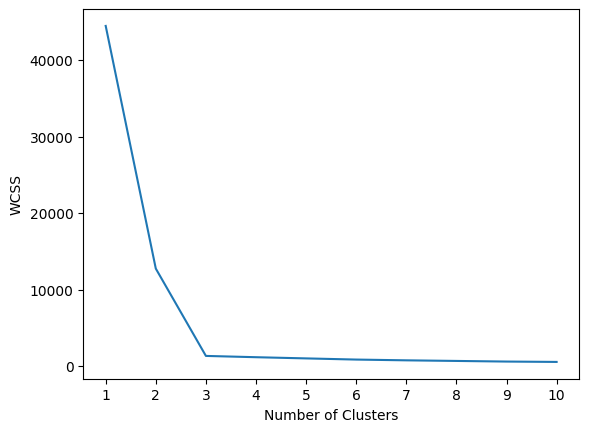

In [17]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3, init = 'k-means++')

####**Train Data**

In [19]:
y_labels = kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


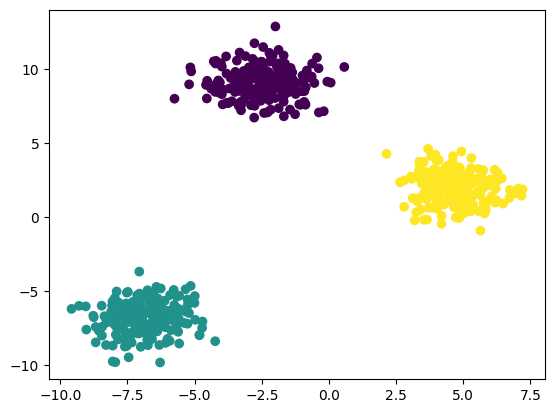

In [20]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_labels)

####**Test Data**

In [22]:
y_test_label = kmeans.predict(X_test)

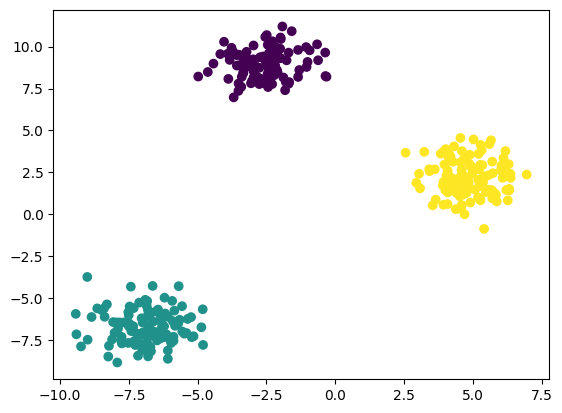

In [23]:
plt.scatter(X_test[:,0], X_test[:,1], c = y_test_label)

##**Knee Locator to find the K value**

In [24]:
!pip install kneed

In [25]:
from kneed import KneeLocator

In [27]:
kl = KneeLocator(range(1, 11), wcss, curve = 'convex', direction = 'decreasing')
kl.elbow

3

### **Performance Metrics**

In [29]:
# silhouette_score
from sklearn.metrics import silhouette_score

In [30]:
silhouette_coefficient = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train, kmeans.labels_)
  silhouette_coefficient.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

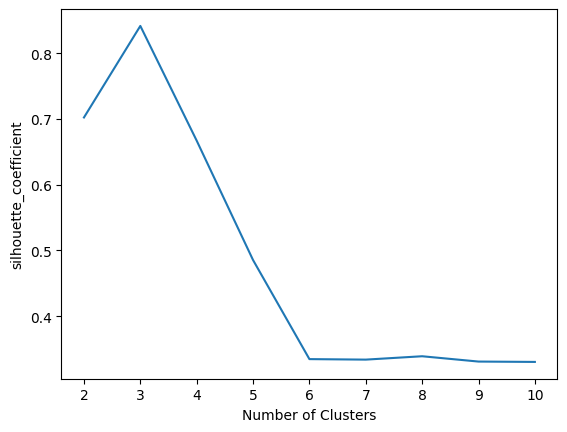

In [31]:
plt.plot(range(2, 11), silhouette_coefficient)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette_coefficient')
plt.show()